MLE Homework #4 Travis Johnson 662018371

#Problem 1

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Defining class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Normalizing the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Splitting into training (70%) and validation (30%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


#Part A

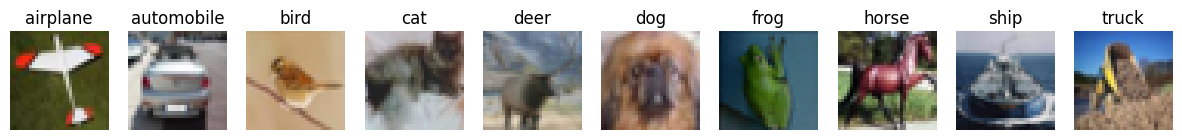

In [2]:
# Visualizing the dataset
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    axes[i].imshow(x_train[idx])
    axes[i].set_title(class_names[i])
    axes[i].axis('off')
plt.show()

#Part B

In [4]:
# Defining the fully connected neural network and tune hyperparameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.model_selection import ParameterGrid

# Creating a model
def create_model(hidden_units=128, dropout_rate=0.2):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter grid search
param_grid = {'hidden_units': [64, 128], 'dropout_rate': [0.2, 0.3]}
best_acc = 0
best_params = None
for params in ParameterGrid(param_grid):
    model = create_model(**params)
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=0)
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_acc:
        best_acc = val_acc
        best_params = params

print(f'Best params: {best_params}, Best validation accuracy: {best_acc:.4f}')

# Training final model
final_model = create_model(**best_params)
history = final_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best params: {'dropout_rate': 0.2, 'hidden_units': 128}, Best validation accuracy: 0.3777
Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2145 - loss: 2.1496 - val_accuracy: 0.3079 - val_loss: 1.8957
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2897 - loss: 1.9261 - val_accuracy: 0.3551 - val_loss: 1.8247
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3071 - loss: 1.8882 - val_accuracy: 0.3511 - val_loss: 1.7887
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3121 - loss: 1.8756 - val_accuracy: 0.3284 - val_loss: 1.8277
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3181 - loss: 1.8638 - val_accuracy: 0.3411 - val_loss: 1.8167
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3242 - loss: 1.8435 - val_accuracy: 0.3678 - val_loss: 1.7561
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3210 - loss: 1.8435 - val_accuracy: 0.3691 - val_loss: 1.7778
Epoch 

#Part C

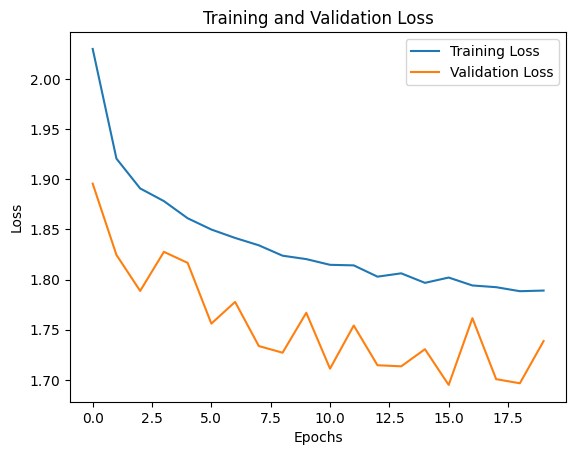

In [5]:
# Plotting Training and Validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

#Part D

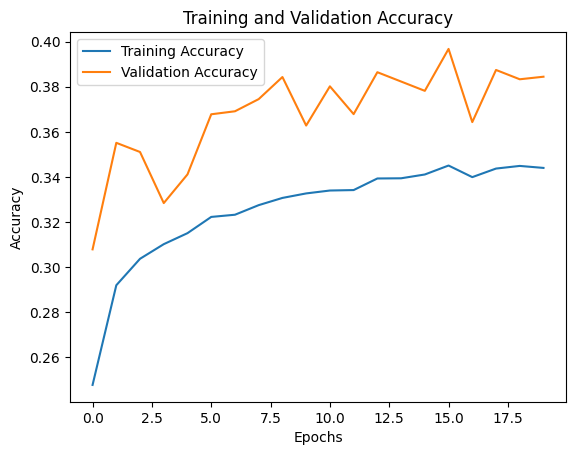

In [6]:
# Plotting Training and Validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

#Problem 2

#Part A

Mounted at /content/drive


<ipython-input-7-a14f71a86437>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


File loaded successfully!
   Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction_side_thickness  Scaled_sound_pressure  
0                0.002663                126.201  
1                0.002663                125.201  
2                0.002663                125.951  
3                0.002663                127.591  
4                0.002663                127.461  


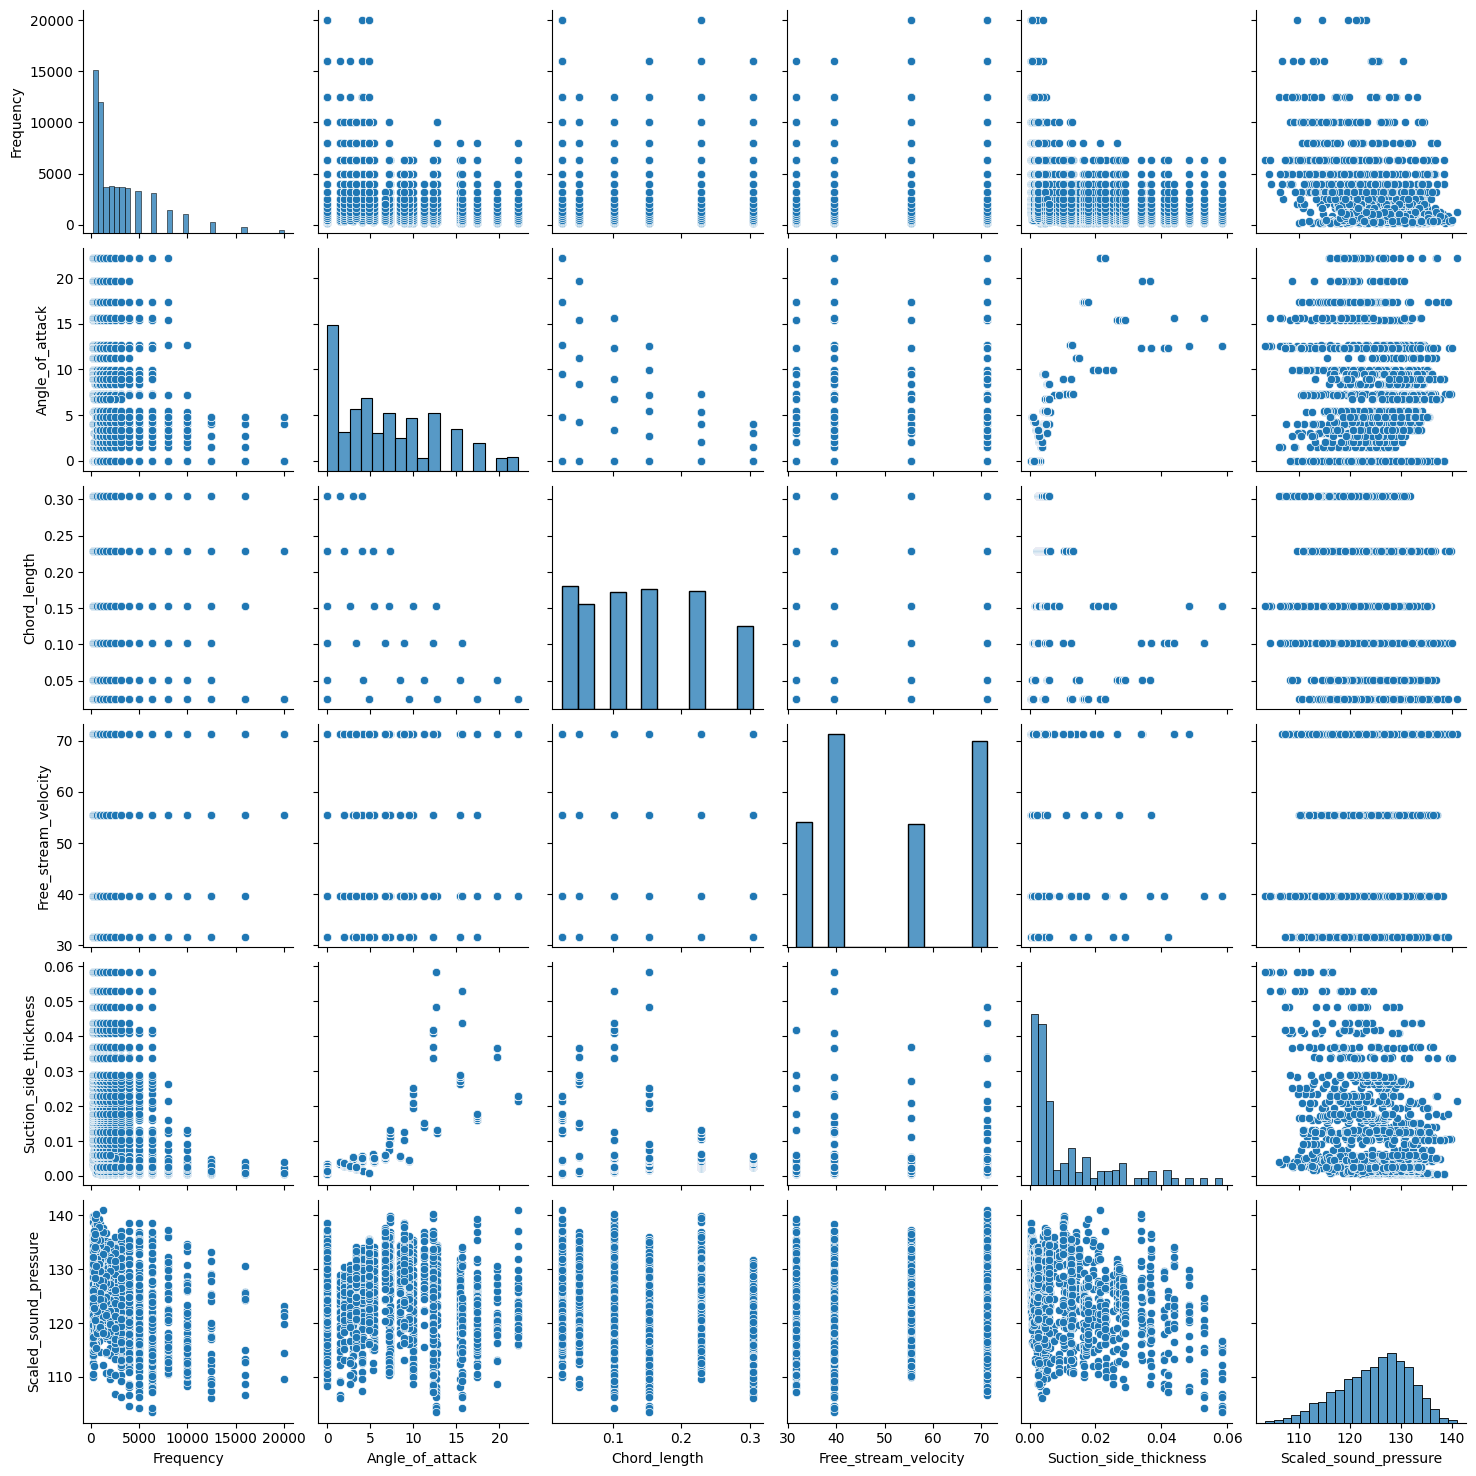

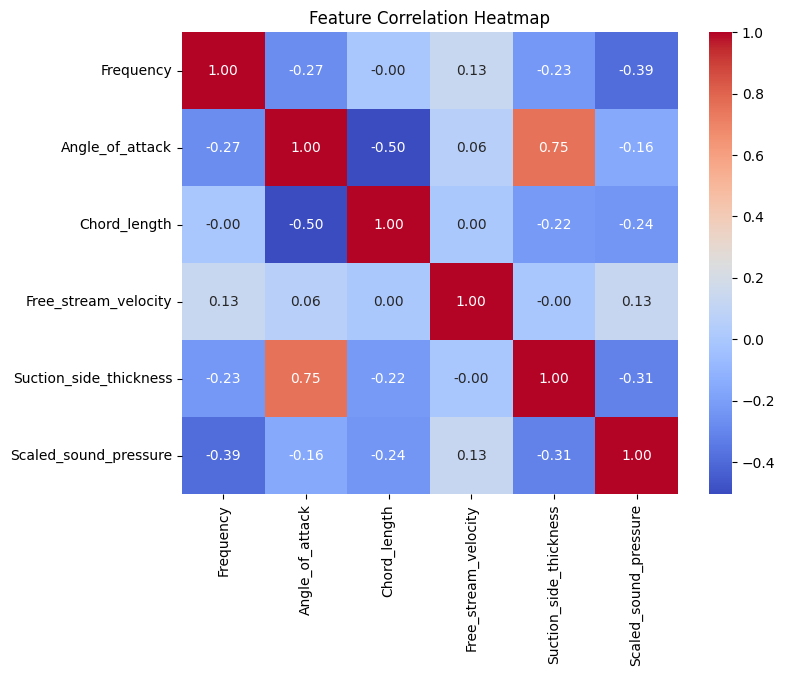

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive')

file_path = "/content/drive/My Drive/MLE Colab Notebooks/airfoil_self_noise.dat"

# Reading the dataset
try:
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    print("File loaded successfully!")
except Exception as e:
    print("Error loading file:", e)

# Defining column names
df.columns = ["Frequency", "Angle_of_attack", "Chord_length", "Free_stream_velocity", "Suction_side_thickness", "Scaled_sound_pressure"]

# Displaying first few rows
print(df.head())

# Pairplot visualization
sns.pairplot(df)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#Part B

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 15510.9229 - mae: 124.3386 - val_loss: 14921.2705 - val_mae: 121.9384
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14607.6328 - mae: 120.6098 - val_loss: 12673.4170 - val_mae: 112.2193
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11438.7402 - mae: 106.1900 - val_loss: 6620.0981 - val_mae: 79.6218
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4813.2720 - mae: 65.1175 - val_loss: 1189.4146 - val_mae: 29.4998
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1111.0352 - mae: 28.4710 - val_loss: 606.7552 - val_mae: 20.1301
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 589.4365 - mae: 20.5499 - val_loss: 445.8055 - val_mae: 17.2186
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 461.3679 - mae: 17.6121 - val_loss: 386.0156 - val_mae: 15.9997
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 379.2423 - mae: 15.8309 - val_loss: 343.3838 - val_mae: 14.9

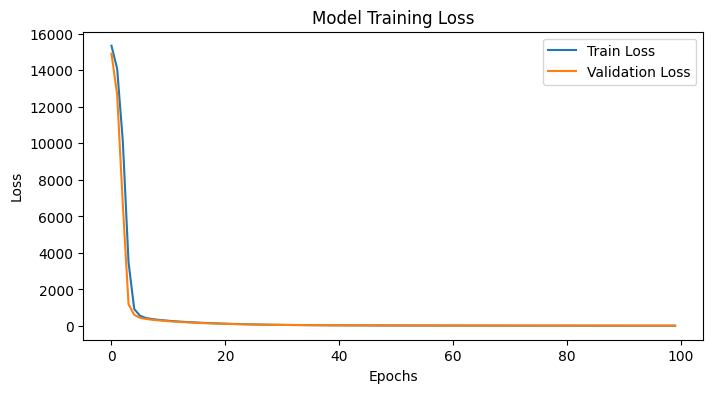

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Splitting features and target variable
X = df.drop(columns=["Scaled_sound_pressure"])
y = df["Scaled_sound_pressure"]

# Train-test splitting (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the neural network model
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)  # Output layer
])

# Compiling the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), verbose=1)

# Plotting training history
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Training Loss")
plt.show()


#Part C

In [9]:
from sklearn.metrics import r2_score

# Making predictions
y_pred = model.predict(X_test_scaled)

# Computing R2 score
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R2 Score): {r2:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Coefficient of Determination (R² Score): 0.7235
